# **INTRODUCTION**

**In this project i will analys the movies data , determine alot of coreletions between its coulmns and get a alot of conclusions**

**but does buget affects the revenue of the film or does is affect the review of it ?** 

# **0.Import libraries**

**First of all we have to import the most important libraries for data science**

In [281]:
import numpy as np #For numerical calculations
import pandas as pd #For data manipulation
import matplotlib.pyplot as plt #For plotting
import seaborn as sns #For advanced plotting
pd.options.display.float_format = '{:.2f}'.format
from matplotlib.ticker import FuncFormatter

# **1.Load the csv File** #

**We must load our data file, in my case its the "MOVIES" one.**

In [282]:
# load our file
file= pd.read_csv('tmdb-movies.csv')

# Create a backup copy to avoid any errors
df = file.copy()

# **2.Examinating our file**

**We must take a concise and comprehensive view**

In [283]:
pd.options.display.float_format = '{:.2f}'.format #To avoid scientific notation
df.head() # First 5 rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


*we must check for data types in our data*

In [284]:
df.info()# Basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**now we can see that the only issue is with release_date , this should be in date data type**

*now we want to check for duplicates*

In [285]:
df.duplicated().sum() # Number of duplicated rows

np.int64(1)

**there is only one duplicate**

*now we want to check for nulls in our data*

In [286]:
null_coulmns = df.isnull().sum() # Check for missing values
null_coulmns= null_coulmns[null_coulmns > 0]
print(null_coulmns)

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


**now we know that we have nulls (missing data) in alot of coulmns like imbd_id , cast and more**

*we want to know the mean,median and mode of numerical coulmns in our data*

In [287]:
df.describe(include='all')# Statistical summary of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10856,10866.00,10866.00,10866.00,10866,10790,2936,10822,8042,...,10862,10866.00,10843,9836,10866,10866.00,10866.00,10866.00,10866.00,10866.00
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.18,NaN,0.65,14625701.09,39823319.79,NaN,NaN,NaN,NaN,NaN,...,NaN,102.07,NaN,NaN,NaN,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,NaN,1.00,30913213.83,117003486.58,NaN,NaN,NaN,NaN,NaN,...,NaN,31.38,NaN,NaN,NaN,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,NaN,0.21,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.00,NaN,NaN,NaN,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,NaN,0.38,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.00,NaN,NaN,NaN,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,NaN,0.71,15000000.00,24000000.00,NaN,NaN,NaN,NaN,NaN,...,NaN,111.00,NaN,NaN,NaN,145.75,6.60,2011.00,20853251.08,33697095.72


**we know now alot of statics about our data like the 5 numbers summary and more**

**now we have to check for uniques in the most important numerical coulmns**

In [288]:
ubudget = df['budget'].unique() # Unique values in the budget column
urevenue = df['revenue'].unique() # Unique values in the revenue column
ubudget_adj = df['budget_adj'].unique() # Unique values in the budget_adj column
urevenue_adj = df['revenue_adj'].unique() # Unique values in the revenue_adj column

as we can see there are non-understanable numbers in all of them like 0 and 1 so we have to find them

In [289]:
l = []
for i in ubudget:
    if i < 10000:
        l.append(i)
l # Budget values less than 10000

[np.int64(0),
 np.int64(10),
 np.int64(18),
 np.int64(1),
 np.int64(117),
 np.int64(5),
 np.int64(75),
 np.int64(5000),
 np.int64(108),
 np.int64(3500),
 np.int64(3),
 np.int64(80),
 np.int64(25),
 np.int64(8),
 np.int64(93),
 np.int64(8000),
 np.int64(97),
 np.int64(20),
 np.int64(68),
 np.int64(28),
 np.int64(32),
 np.int64(17),
 np.int64(110),
 np.int64(300),
 np.int64(15),
 np.int64(89),
 np.int64(750),
 np.int64(650),
 np.int64(500),
 np.int64(114),
 np.int64(2500),
 np.int64(7000),
 np.int64(14),
 np.int64(90),
 np.int64(700),
 np.int64(12),
 np.int64(6000),
 np.int64(27),
 np.int64(6),
 np.int64(2),
 np.int64(95),
 np.int64(126),
 np.int64(30),
 np.int64(21),
 np.int64(200),
 np.int64(113),
 np.int64(115),
 np.int64(11)]

*we want to know how many rows and coulmns in our dataframe*

In [290]:
print(f"Dataset shape: {df.shape}")# Check dimensions of the dataset

Dataset shape: (10866, 21)


**now we know that we have 10866 rows and 21 coulmns**

*the last thing we should know is our coulmns titles*

In [291]:
print(f"Columns: {df.columns.tolist()}")# Check columns of the dataset

Columns: ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


### **To conclude there is errors in the dataframe like data types , duplicates ,missing values and numbers that are non understandable**

# **3.Cleaning**

*first of all we have to drop duplicates and fill missing values*

In [292]:
df.drop_duplicates(inplace=True)# Drop duplicates
df.duplicated().sum() #checking for duplicates

np.int64(0)

**since there is no duplicates lets go to the second step**

*filling missing values*

**since imbd_id missing values is less than 10 so i guess its better to search and fill with the right id**

*here to get the missing value row to know the film name*

In [293]:
missing_indices_id = df[df['imdb_id'].isnull()].index.tolist()
df.loc[missing_indices_id]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.11,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.50,2015,0.00,0.00
997,287663,NaN,0.33,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.80,2014,0.00,0.00
1528,15257,NaN,0.61,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.90,2009,0.00,0.00
1750,101907,NaN,0.26,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.40,2009,0.00,0.00
2401,45644,NaN,0.07,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.60,2010,0.00,0.00
4797,369145,NaN,0.17,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.80,2012,0.00,0.00
4872,269177,NaN,0.09,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.40,2012,0.00,0.00
6071,279954,NaN,0.00,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.50,2013,468.02,0.00
7527,50127,NaN,0.57,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.30,2007,0.00,0.00
7809,50128,NaN,0.06,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.00,2007,0.00,0.00


*now we fill it with the data that we got*

In [294]:
df.loc[548, 'imdb_id'] = 'tt6963278'
df.loc[997, 'imdb_id'] = 'tt3816564'
df.loc[1528, 'imdb_id'] = 'tt1325753'
df.loc[1750, 'imdb_id'] = 'tt1325753'
df.loc[2401, 'imdb_id'] = 'tt9256340'
df.loc[4797, 'imdb_id'] = 'tt2380513'
df.loc[4872, 'imdb_id'] = 'tt0411951'
df.loc[6071, 'imdb_id'] = 'tt9755546'
df.loc[7527, 'imdb_id'] = 'tt8936254'
df.loc[7809, 'imdb_id'] = 'tt0838800'

In [295]:
null_coulmns = df.isnull().sum() # Check for missing values
null_coulmns= null_coulmns[null_coulmns > 0]
print(null_coulmns)

cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


**now there is no missing values in IMDB_ID**

**filling the other data**

now we can fill the overview

In [296]:
missing_indices_id = df[df['overview'].isnull()].index.tolist()
df.loc[missing_indices_id]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,tt6963278,0.11,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.50,2015,0.00,0.00
2370,127717,tt1525359,0.08,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.80,2010,0.00,0.00
3722,85993,tt1680105,0.28,0,0,Baciato dalla fortuna,Vincenzo Salemme|Asia Argento|Alessandro Gassm...,NaN,Paolo Costella,NaN,...,NaN,100,Comedy,NaN,9/30/11,13,4.70,2011,0.00,0.00
3794,58253,tt1588335,0.18,0,0,"Toi, moi, les autres",LeÃ¯la Bekhti|Benjamin Siksou|CÃ©cile Cassel|C...,http://www.google.fr/m/url?ei=e3BxTcjeLMqB8wP6...,Audrey Estrougo,NaN,...,NaN,0,Music|Romance,NaN,2/22/11,17,5.20,2011,0.00,0.00


In [297]:
df['overview'].fillna('No overview', inplace=True)
null_coulmns = df.isnull().sum() # Check for missing values
null_coulmns= null_coulmns[null_coulmns > 0]
print(null_coulmns)

cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
genres                    23
production_companies    1030
dtype: int64


C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\4175242774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna('No overview', inplace=True)


we can fill the cast,homepage,director,tagline,keywords,genres,production with unknown since they are categorical and more than 10 missing values

In [298]:
df['cast'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['genres'].fillna('Unknown', inplace=True)
df['production_companies'].fillna('Unknown', inplace=True)
df['keywords'].fillna('Unknown', inplace=True)
df['tagline'].fillna('Unknown', inplace=True)
df['homepage'].fillna('Unknown', inplace=True)

C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\4204477758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)
C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\4204477758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [299]:
null_coulmns = df.isnull().sum() # Check for missing values
null_coulmns= null_coulmns[null_coulmns > 0]
print(null_coulmns)

Series([], dtype: int64)


**now we have to change the data type of release_date to date**

In [300]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y') # Convert release_date to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   homepage              10865 non-null  object        
 8   director              10865 non-null  object        
 9   tagline               10865 non-null  object        
 10  keywords              10865 non-null  object        
 11  overview              10865 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres               

**now lets fill the non-correct numbers in numerical coulmns**

we wont use the budjet and revenue because budget_adj and revenue_adj is the same but after inflation so we can fill numbers in budget_adj and revenue_adj with the median since it doesnt get affected by outliers , but first lets find outliers for all of them

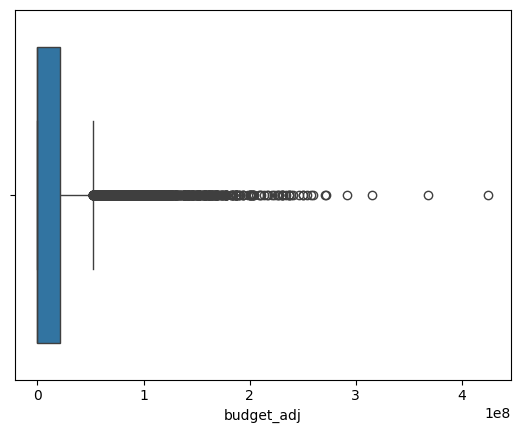

In [301]:
# Visual detection
sns.boxplot(x=df['budget_adj'])
plt.show()

# Statistical detection
Q1 = df['budget_adj'].quantile(0.25)
Q3 = df['budget_adj'].quantile(0.75)
IQR = Q3 - Q1

# Cap outliers
df['budget_adj'] = np.where(df['budget_adj'] > (Q3 + 1.5*IQR), (Q3 + 1.5*IQR),
                        np.where(df['budget_adj'] < (Q1 - 1.5*IQR), (Q1 - 1.5*IQR),
                        df['budget_adj']))

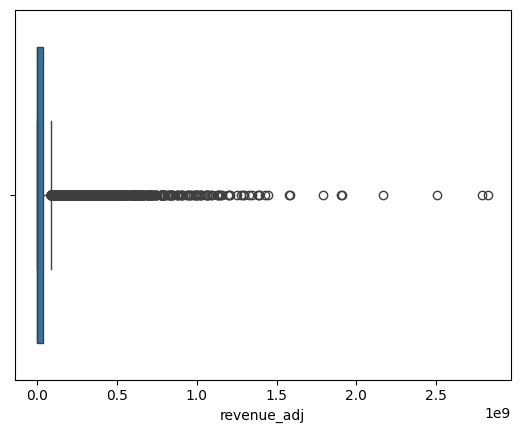

In [302]:
# Visual detection
sns.boxplot(x=df['revenue_adj'])
plt.show()

# Statistical detection
Q1 = df['revenue_adj'].quantile(0.25)
Q3 = df['revenue_adj'].quantile(0.75)
IQR = Q3 - Q1

# Cap outliers
df['revenue_adj'] = np.where(df['revenue_adj'] > (Q3 + 1.5*IQR), (Q3 + 1.5*IQR),
                        np.where(df['revenue_adj'] < (Q1 - 1.5*IQR), (Q1 - 1.5*IQR),
                        df['revenue_adj']))

**since all of them has outliers so we will fill the non-understandable values with the median**

In [303]:
# Calculate the median of the 'budget' column
budget_adj_median = df[df['budget_adj'] > 0]['budget_adj'].median()

# Replace values in the 'budget' column that are less than 10,000 with the column median
df['budget_adj'] = df['budget_adj'].apply(lambda x: budget_adj_median if x <= 10000  else x)
df['budget_adj'].value_counts()


budget_adj
22715052.32    5767
52133127.71    1231
21033371.65      17
10164004.34      17
20000000.00      16
               ... 
26474189.50       1
13370802.78       1
7688211.60        1
50140510.42       1
1002810.21        1
Name: count, Length: 1854, dtype: int64

In [304]:
# Calculate the median of the 'revenue' column
revenue_adj_median = df[df['revenue_adj'] > 0]['revenue_adj'].median()

# Replace values in the 'budget' column that are less than 10,000 with the column median
df['revenue_adj'] = df['revenue_adj'].apply(lambda x: revenue_adj_median if x <= 10000  else x)
df['revenue_adj'] == 0


0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Name: revenue_adj, Length: 10865, dtype: bool

and now lets put another coulmn for net profit

In [305]:
df['net_profit'] = df['revenue_adj'] - df['budget_adj'] # Calculate net profit

# **3.EDA**

### **Now lets use some questions to do some EDA on our clean data**

1. Does the budget affects the revenue ?
2. Does the budget affects review ?
3. Does the budget affects the approval ?
4. Does the revenue has a corelation with the popularity ?

first of all lets do a function to make life easier on me 

In [306]:
def bar_plot(data,x,y,title_x,title_y,title,rotation): # create a function to plot bar graphs
    plt.figure(figsize=(10,6))
    sns.barplot(data=data,x=x,y=y, palette='viridis')
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.show()
def scattar_plot(data,x,y,title_x,title_y,title): # create a function to plot scatter graphs
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data,x=x,y=y)
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.show()

**thats a function for bar plots**

C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\993808032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x=x,y=y, palette='viridis')


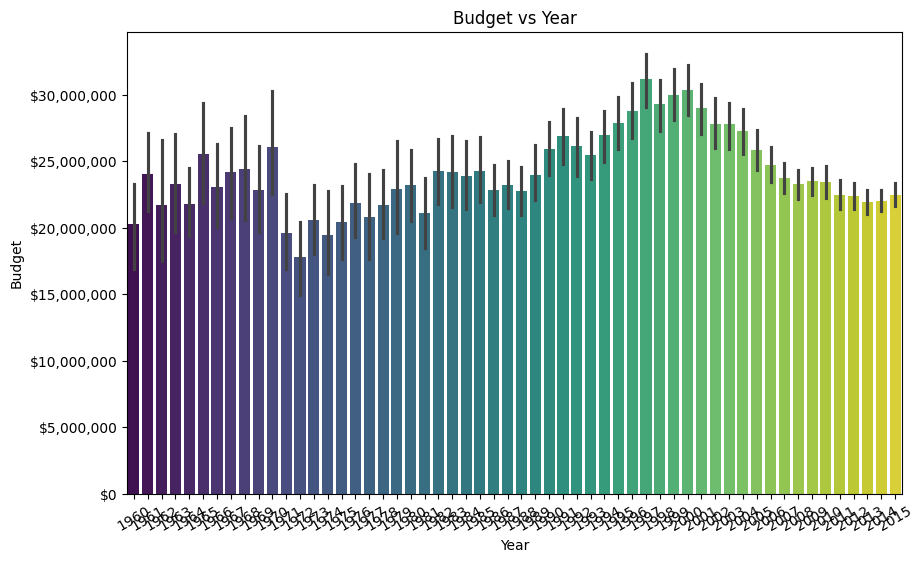

In [307]:
pd.options.display.float_format = '{:.2f}'.format
#Budget vs Year
bar_plot(df,'release_year','budget_adj','Year','Budget','Budget vs Year',30)

here we can see that there is no corelations between the production year of the film and the budget

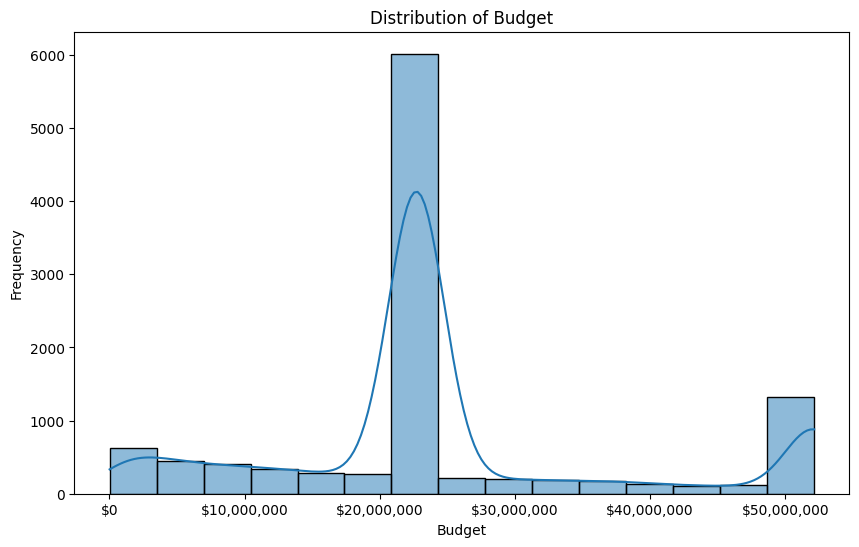

In [308]:
def currency(x, pos):
    'The two args are the value and tick position'
    return '${:,.0f}'.format(x)

formatter = FuncFormatter(currency)
# Distribution of budget
plt.figure(figsize=(10, 6))
sns.histplot(df['budget_adj'], kde=True)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

there's alot of films that had 50 mil budget to start with

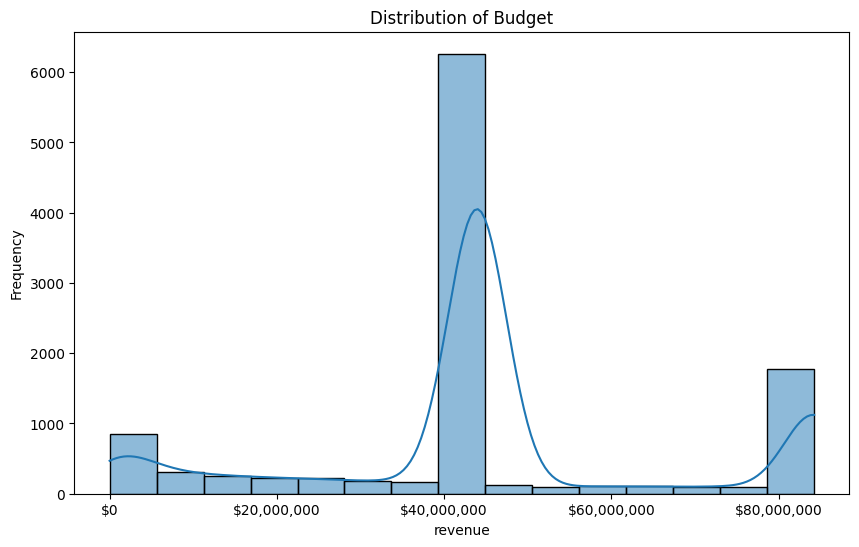

In [309]:
# Distribution of budget
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue_adj'], kde=True)
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

Alot of films earned 80 mil till now , but i wonder wheather if they profited or not from producing films

C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\1154168267.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['net_profit'], kde=True, palette='viridis')


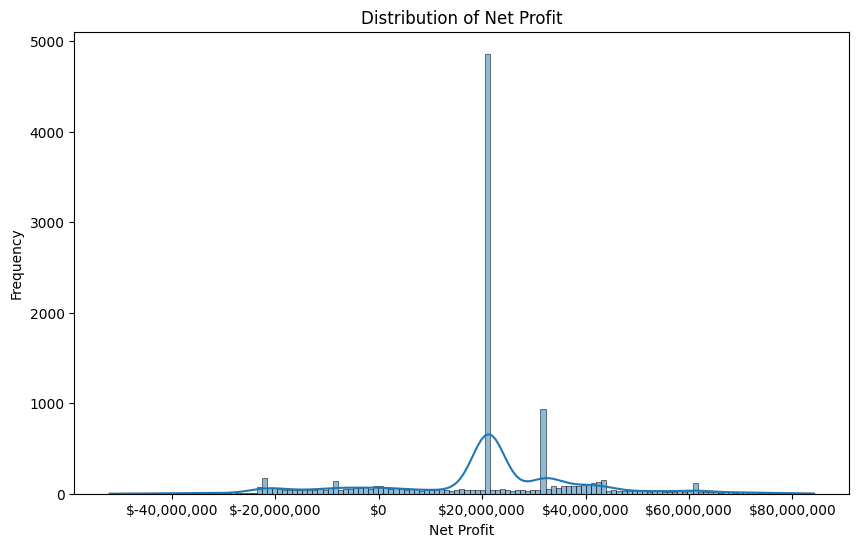

In [310]:
# Distribution of net profit
plt.figure(figsize=(10, 6))
sns.histplot(df['net_profit'], kde=True, palette='viridis')
plt.xlabel('Net Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Net Profit')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

alot of films earned more than 20 mil and alot lost alot too. but does votes affects ? 

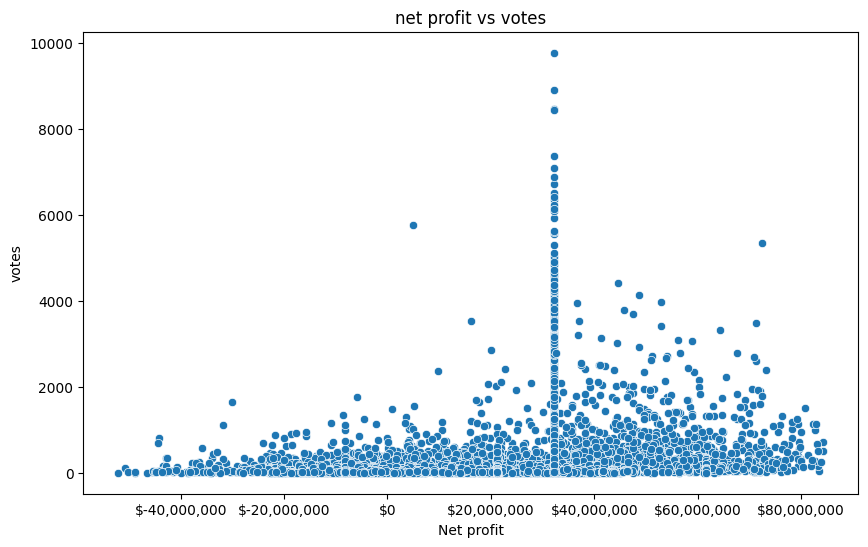

In [311]:
scattar_plot(df,'net_profit','vote_count','Net profit','votes','net profit vs votes')

i guess that doesnt corelate 

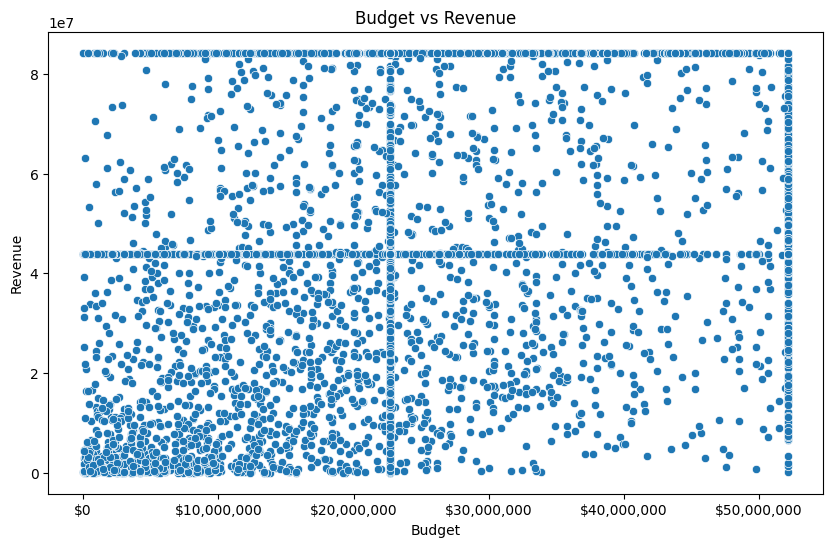

In [312]:
scattar_plot(df,'budget_adj','revenue_adj','Budget','Revenue','Budget vs Revenue') # Budget vs Revenue

that also doesnt corelate 

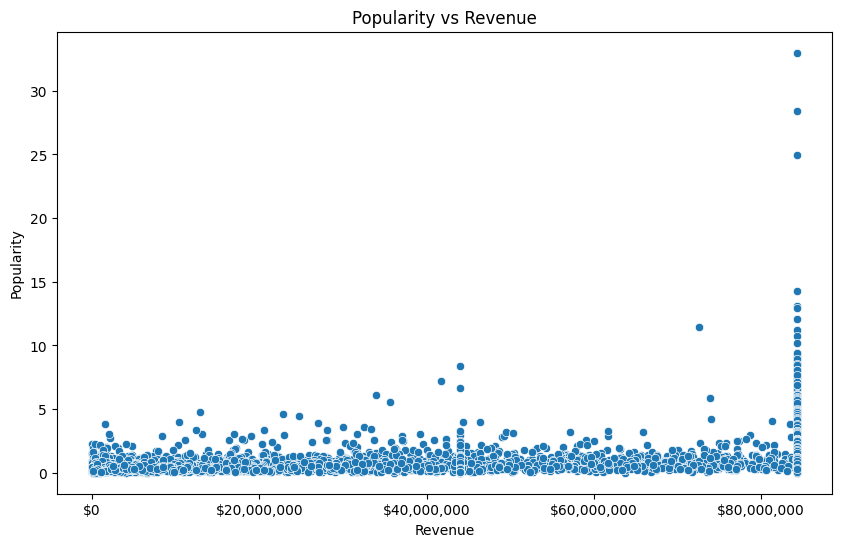

In [313]:
scattar_plot(df,'revenue_adj','popularity','Revenue','Popularity','Popularity vs Revenue') # Popularity vs Revenue

we can see that some films with 80 mil revenue has over 20 popularity

C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\3961715432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_companies.values, y=top_20_companies.index, palette='viridis')


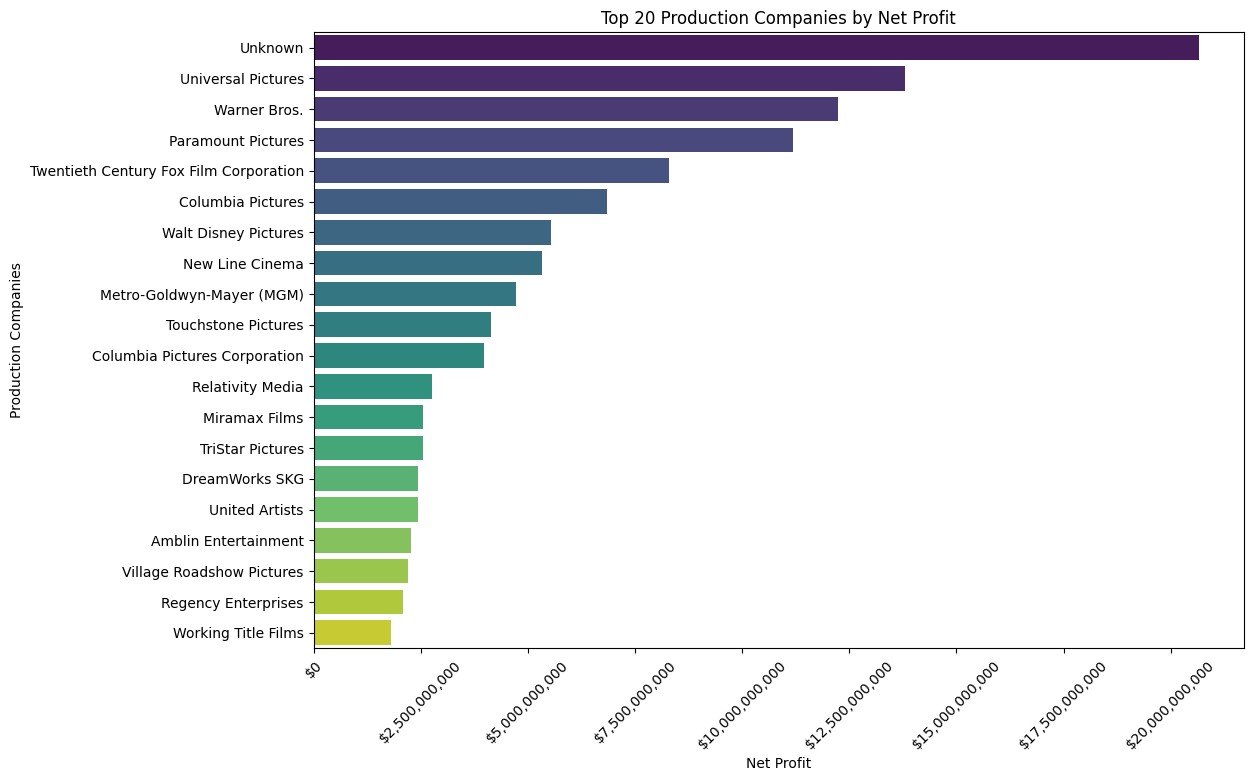

In [314]:
# Calculate net profit for each film
all_companies = df['production_companies'].str.split('|').explode() # Split production companies
df_exploded = df[['net_profit']].join(all_companies) # Join net profit with production companies
company_profits = df_exploded.groupby('production_companies')['net_profit'].sum()
top_20_companies = company_profits.sort_values(ascending=False).head(20) # Top 20 production companies by net profit
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_companies.values, y=top_20_companies.index, palette='viridis')
plt.xlabel('Net Profit')
plt.ylabel('Production Companies')
plt.title('Top 20 Production Companies by Net Profit')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.show()

from this we can see the best 20 companies in producing films 

C:\Users\ACS\AppData\Local\Temp\ipykernel_16232\1038613550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='viridis')


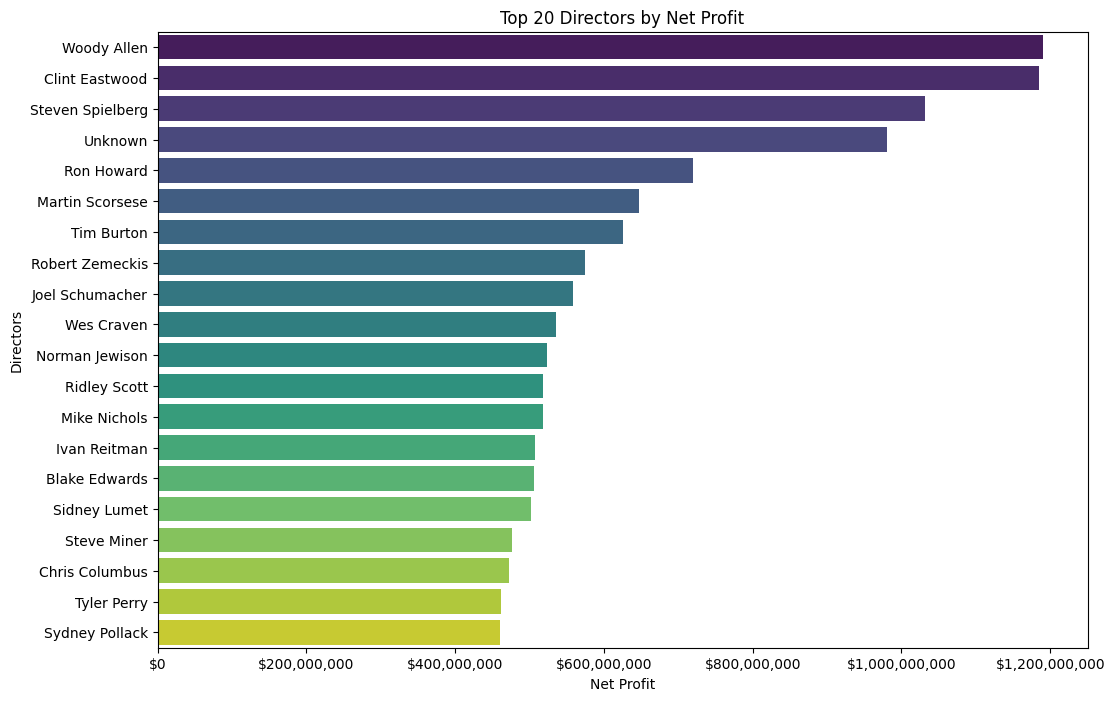

In [318]:
director_profits = df.groupby('director')['net_profit'].sum()
top_20_directors = director_profits.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='viridis')
plt.xlabel('Net Profit')
plt.ylabel('Directors')
plt.title('Top 20 Directors by Net Profit')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

wow there is some directors who earned more than 1 bil.

### **conclusion**

In this analysis of the TMDB movies dataset, we explored various aspects of the data, including budget, revenue, production companies, and directors.

Budget Distribution:

The budget distribution of movies shows alot, with many films having a budget of around 50 million dollars. This indicates that low films are common in this dataset.

Revenue vs. Popularity:

There is no clear correlation between the production year of the film and the budget. This suggests that the budget allocated to films does not necessarily increase or decrease consistently over the years.

Top Production Companies:

We identified the top 20 production companies by net profit. These companies have produced some of the most profitable films in the dataset, contributing significantly to the overall revenue.

Top Directors:

Similarly, we identified the top 20 directors by net profit. These directors have consistently delivered high-grossing films, making them some of the most successful directors in history.

Handling Missing Values:

We handled missing values in the dataset by filling them with appropriate values, such as the mean or median, to make sure the analysis was not affected by incomplete data.

Data Visualization:

Various visualizations, including bar plots and histograms, helped us understand the distribution and relationships within the data. These visualizations provided ideas of the financial aspects of movie production and the success of different entities involved.
Overall, this analysis provided a comprehensive overview of the financial dynamics in the movie industry, highlighting the key players and trends. The findings can be useful for stakeholders in the industry to make informed decisions about future movie productions and investments.

### **limitations**

there are alot of limitations such as : not being surred 100% about predictions and having alot of non filled data that made visuallization hard . but at the end of the day we can use those visuals in alot of things such as having insights about the data but we cant predict a movie will go up or down by the end of the year.

 # **4.changing the file to html**

In [1]:
import nbformat
from nbconvert import HTMLExporter

# Load the notebook
with open('movie.ipynb') as f:
    notebook_content = f.read()

# Convert the notebook to HTML
notebook_node = nbformat.reads(notebook_content, as_version=4)
html_exporter = HTMLExporter()
html_data, resources = html_exporter.from_notebook_node(notebook_node)

# Save the HTML output to a file
with open('movie.html', 'w') as f:
    f.write(html_data)

print("Notebook has been successfully converted to HTML.")

Notebook has been successfully converted to HTML.
